- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



In [1]:
import numpy as np
signs = ['Speed limit (20km/h)',	'Speed limit (30km/h)',	'Speed limit (50km/h)',	'Speed limit (60km/h)',	'Speed limit (70km/h)',	'Speed limit (80km/h)',	'End of speed limit (80km/h)',	'Speed limit (100km/h)',	'Speed limit (120km/h)',	'No passing',	'No passing for vehicles over 3.5 metric tons',	'Right-of-way at the next intersection',	'Priority road',	'Yield',	'Stop',	'No vehicles',	'Vehicles over 3.5 metric tons prohibited',	'No entry',	'General caution',	'Dangerous curve to the left',	'Dangerous curve to the right',	'Double curve',	'Bumpy road',	'Slippery road',	'Road narrows on the right',	'Road work',	'Traffic signals',	'Pedestrians',	'Children crossing',	'Bicycles crossing',	'Beware of ice/snow',	'Wild animals crossing',	'End of all speed and passing limits',	'Turn right ahead',	'Turn left ahead',	'Ahead only',	'Go straight or right',	'Go straight or left',	'Keep right',	'Keep left',	'Roundabout mandatory',	'End of no passing',	'End of no passing by vehicles over 3.5 metric tons']

image_names = dict(zip(np.arange(0,43), signs))

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# need to import pickle to import the data
import pickle

# importing the wrap function in order to dispaly the full image name as some names are very long
from textwrap import wrap

## Loading the dataset:

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)

with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
# dividing the various datasets into feature and target sets

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Checking the dimensions of all the datasets and interpreting them

In [5]:
print("The dimensions for the feature set of training data are : {}".format(X_train.shape))
print("The dimensions for the target set of training data are : {}".format(y_train.shape))

# in X_train the first dimension indicates the number of data points, and the rest represent the dimensions of each image
# since it is a 4-dimensional data, it means that each image is a color image.
# the first dimension indicates that there are 34799 images in the training set
# in other words, the length and width of the image is 32 respectively, meaning that it is a 32x32 size image
# 3 means that there are three color channels in the image, indicating that it is not grayscale, but a color image

The dimensions for the feature set of training data are : (34799, 32, 32, 3)
The dimensions for the target set of training data are : (34799,)


In [6]:
print("The dimensions for the feature set of validation data are : {}".format(X_validation.shape))
print("The dimensions for the target set of validation data are : {}".format(y_validation.shape))

# there are 4410 images in the validation set of size 32x32, and with three color channels; same as in teh training set

The dimensions for the feature set of validation data are : (4410, 32, 32, 3)
The dimensions for the target set of validation data are : (4410,)


In [7]:
print("The dimensions for the feature set of test data are : {}".format(X_test.shape))
print("The dimensions for the target set of test data are : {}".format(y_test.shape))

# there are 12670 images in the test set, each of dimension 32x32x3

The dimensions for the feature set of test data are : (12630, 32, 32, 3)
The dimensions for the target set of test data are : (12630,)


## Exploratory Data Analysis

Yield


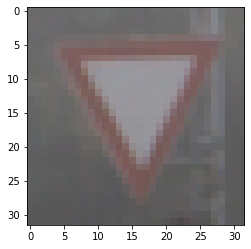

In [8]:
# storing the length of the feature training datset in order to access an image from it
n_training = len(X_train)

# picking a random index to see the image and its corresponding label
i = np.random.randint(1,n_training)

plt.imshow(X_train[i])
print(image_names.get(y_train[i]))

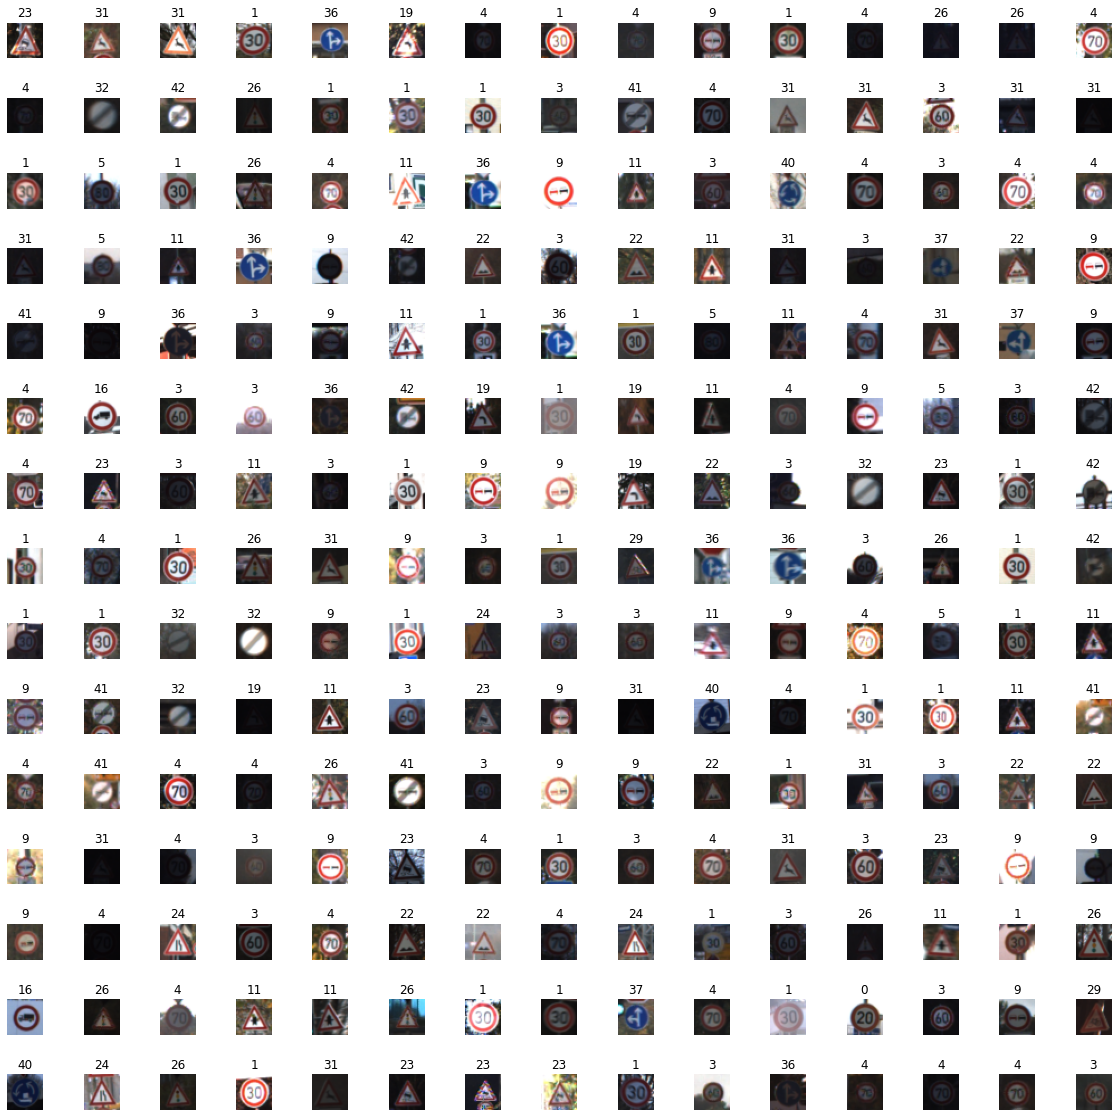

In [77]:
# creating a grid of training images
length_grid = 15
width_grid = 15
fig, axes = plt.subplots(width_grid, length_grid, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, length_grid * width_grid):
    index = np.random.randint(1,n_training)
    axes[i].imshow(X_train[index])
    
    #     setting the title for each image
    axes[i].set_title(y_train[index])

    #     switching off the axes for each images to show it more clearly
    axes[i].axis('off')
    
# adding some space between the images to make the visualization clearer
plt.subplots_adjust(hspace= 1.1, wspace=  0.6)    

Speed limit (50km/h)


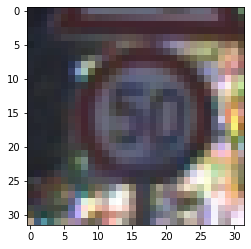

In [10]:
# checking a sample from the validation dataset
# storing the length of the feature training datset in order to access an image from it
n_valid = len(X_validation)

# picking a random index to see the image and its corresponding label
i = np.random.randint(1,n_valid)

plt.imshow(X_validation[i])
print(image_names.get(y_validation[i]))

Speed limit (30km/h)


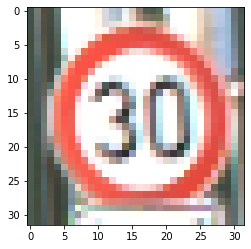

In [11]:
# checking a sample from the test dataset
# storing the length of the feature training datset in order to access an image from it
n_test = len(X_test)

# picking a random index to see the image and its corresponding label
i = np.random.randint(1,n_test)

plt.imshow(X_test[i])
print(image_names.get(y_test[i]))

## Data Preparation

In [12]:
# converting the images in each dataset to grayscale in order to reduce a dimension further
X_train_gray = np.mean(X_train, axis = 3, keepdims=True)

X_valid_gray = np.mean(X_validation, axis = 3, keepdims=True)

X_test_gray = np.mean(X_test, axis = 3, keepdims=True)

In [13]:
# checking the shape of the new datasets:
print("The dimensions for the feature set of grayscale training data are : {}".format(X_train_gray.shape))

print("The dimensions for the feature set of grayscale validation data are : {}".format(X_valid_gray.shape))

print("The dimensions for the feature set of grayscale testing data are : {}".format(X_test_gray.shape))

The dimensions for the feature set of grayscale training data are : (34799, 32, 32, 1)
The dimensions for the feature set of grayscale validation data are : (4410, 32, 32, 1)
The dimensions for the feature set of grayscale testing data are : (12630, 32, 32, 1)


In [14]:
# Normalizing the datasets:
X_train_gray_norm = (X_train_gray - 128)/128

X_valid_gray_norm = (X_valid_gray - 128)/128

X_test_gray_norm = (X_test_gray - 128)/128

In [15]:
# checking one datapoint from X_train_gray_norm
X_train_gray_norm[0]

array([[[-0.79947917],
        [-0.80729167],
        [-0.80989583],
        ...,
        [-0.78125   ],
        [-0.78385417],
        [-0.78125   ]],

       [[-0.79166667],
        [-0.8046875 ],
        [-0.8046875 ],
        ...,
        [-0.78125   ],
        [-0.78645833],
        [-0.78645833]],

       [[-0.79166667],
        [-0.8046875 ],
        [-0.80729167],
        ...,
        [-0.78125   ],
        [-0.78645833],
        [-0.78645833]],

       ...,

       [[-0.80729167],
        [-0.79947917],
        [-0.79427083],
        ...,
        [-0.80729167],
        [-0.80729167],
        [-0.80208333]],

       [[-0.80729167],
        [-0.79947917],
        [-0.79166667],
        ...,
        [-0.80729167],
        [-0.80729167],
        [-0.80989583]],

       [[-0.8046875 ],
        [-0.796875  ],
        [-0.79427083],
        ...,
        [-0.80989583],
        [-0.81510417],
        [-0.82291667]]])

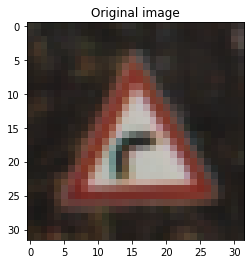

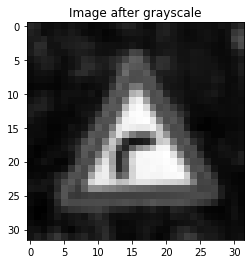

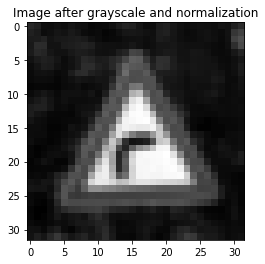

Label: Dangerous curve to the right


In [16]:
# storing the length of the normalized grayscale feature training dataset in order to access an image from it
n_training = len(X_train_gray_norm)

# picking a random index to see the image and its corresponding label
i = np.random.randint(1,n_training)

# displaying the image from the original dataset
plt.imshow(X_train[i])
plt.title("Original image")
plt.show()


# displaying the image after it was converted to grayscale
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.title("Image after grayscale")
plt.show()

# displaying the grayscale image after normalization was applied to it
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.title("Image after grayscale and normalization")
plt.show()

# printing the name of the image corresponding to the selected index
print("Label: {}".format(image_names.get(y_train[i])))

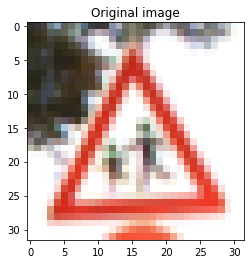

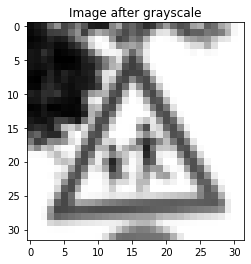

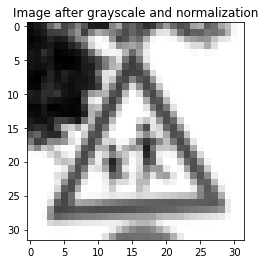

Label: Children crossing


In [17]:
# storing the length of the normalized grayscale feature validation dataset in order to access an image from it
n_training = len(X_valid_gray_norm)

# picking a random index to see the image and its corresponding label
i = np.random.randint(1,n_training)

# displaying the image from the original dataset
plt.imshow(X_validation[i])
plt.title("Original image")
plt.show()


# displaying the image after it was converted to grayscale
plt.imshow(X_valid_gray[i].squeeze(), cmap = 'gray')
plt.title("Image after grayscale")
plt.show()

# displaying the grayscale image after normalization was applied to it
plt.imshow(X_valid_gray_norm[i].squeeze(), cmap = 'gray')
plt.title("Image after grayscale and normalization")
plt.show()

# printing the name of the image corresponding to the selected index
print("Label: {}".format(image_names.get(y_validation[i])))

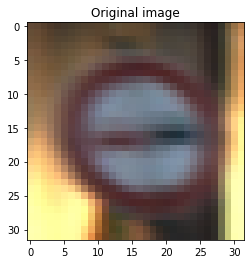

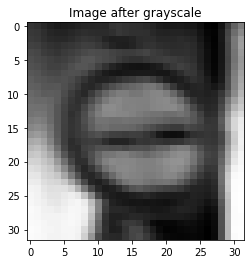

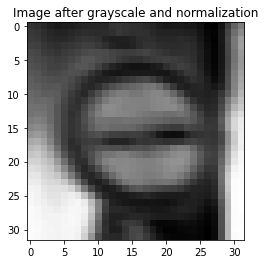

Label: No passing


In [18]:
# storing the length of the normalized grayscale feature testing dataset in order to access an image from it
n_training = len(X_test_gray_norm)

# picking a random index to see the image and its corresponding label
i = np.random.randint(1,n_training)

# displaying the image from the original dataset
plt.imshow(X_test[i])
plt.title("Original image")
plt.show()


# displaying the image after it was converted to grayscale
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.title("Image after grayscale")
plt.show()

# displaying the grayscale image after normalization was applied to it
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')
plt.title("Image after grayscale and normalization")
plt.show()

# printing the name of the image corresponding to the selected index
print("Label: {}".format(image_names.get(y_test[i])))

## Model Training

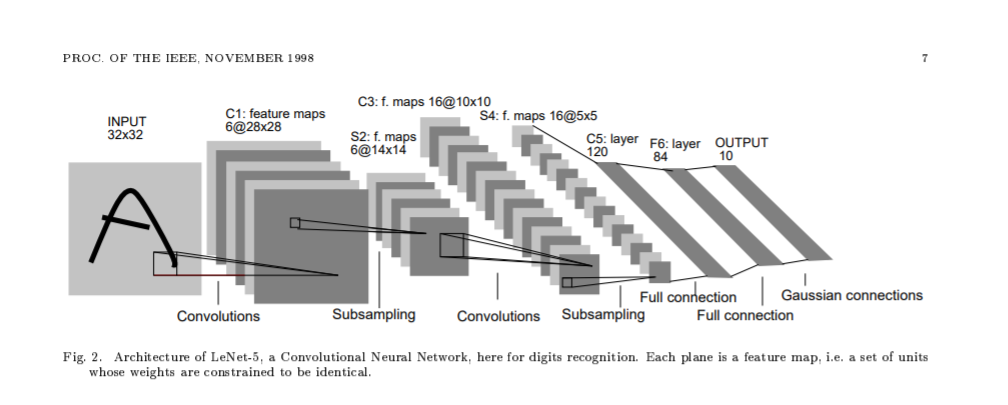

*Picture of the Le Net Architecture presented by Yann LeCun*

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16
    

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400


- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output
    

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output


- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43
    - The output for the final layer is 43 as there are 43 classes in the target variable

In [19]:
import keras
# importing the required libraries
# import Sequential to build the model in a sequential fashion, from left to right
from keras.models import Sequential

# import different layers to perform different processes:
# 1. Conv2D will perform the convolution process
# 2. MaxPooling2D will perform downsampling/subsampling to reduce the dimensionality of the image
# 3. AveragePooling2D is another method of dimensioanlity reduction
# 4. Dense will create the fully connected ANN
# 5. Flatten will convert the array from 2D to 1D so that it can be fed to produce the final output
# 6. Dropout is used to drop some neurons from the model to prevent overfitting and create a good model

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

# Adam optimizer is frequently used to update the weights of the network
from keras.optimizers import Adam

# Tensorflow is used as the backend to Keras API
from keras.callbacks import TensorBoard

In [20]:
input_shape  = X_train_gray_norm.shape[1:]

In [21]:
# Building the model layer by layer
cnn_model = Sequential()


# Adding the first Convolution layer. Adding 6 filters, each of kernel_size (5,5)
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = input_shape))

# The next step is to pool the output to reduce the size from 32x32 to 28x28
cnn_model.add(AveragePooling2D())


# Adding the second Convolution layer. Adding 6 filters, each of kernel_size (5,5)
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))

# The next step is to pool the output to reduce the size from 32x32 to 28x28
cnn_model.add(AveragePooling2D())

# Flattening the output
cnn_model.add(Flatten())

# Adding the first fully connected layer:
cnn_model.add(Dense(activation = 'relu', units = 120))


# Adding the second fully connected layer:
cnn_model.add(Dense(activation = 'relu', units = 84))


# Adding the last fully connected layer. Changing the activation function to 
# softmax as we need to predict 43 categorical classes:
cnn_model.add(Dense(activation = 'softmax', units = 43))

In [22]:
# compiling the model
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [23]:
# Adding EarlyStopping to avoid the model training unneccesarily
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25)

In [33]:
history = cnn_model.fit(
        x = X_train_gray_norm, 
        y = y_train, 
        batch_size= 500, 
        epochs = 500,
        validation_data= (X_valid_gray_norm, y_validation),
        callbacks=[early_stop],
        shuffle = True
)

Epoch 1/500
70/70 [==============================] - 5s 77ms/step - loss: 3.6222e-04 - accuracy: 1.0000 - val_loss: 0.8930 - val_accuracy: 0.8887
Epoch 2/500
70/70 [==============================] - 6s 86ms/step - loss: 3.4626e-04 - accuracy: 1.0000 - val_loss: 0.8844 - val_accuracy: 0.8880
Epoch 3/500
70/70 [==============================] - 5s 77ms/step - loss: 3.5508e-04 - accuracy: 1.0000 - val_loss: 0.8688 - val_accuracy: 0.8900
Epoch 4/500
70/70 [==============================] - 6s 82ms/step - loss: 9.7641e-04 - accuracy: 0.9998 - val_loss: 0.9302 - val_accuracy: 0.8866
Epoch 5/500
70/70 [==============================] - 6s 79ms/step - loss: 3.9282e-04 - accuracy: 1.0000 - val_loss: 0.9025 - val_accuracy: 0.8868
Epoch 6/500
70/70 [==============================] - 6s 82ms/step - loss: 2.8530e-04 - accuracy: 1.0000 - val_loss: 0.9075 - val_accuracy: 0.8875
Epoch 7/500
70/70 [==============================] - 5s 74ms/step - loss: 4.6594e-04 - accuracy: 0.9999 - val_loss: 0.9055 -

## Model Evaluation

In [34]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)

print("Test Accuracy : {}".format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.3212 - accuracy: 0.9008
Test Accuracy : 0.9007917642593384


In [57]:
df_history = pd.DataFrame(history.history)
df_history.head(3)

,loss,accuracy,val_loss,val_accuracy
0,0.000362,1.000000,0.892999,0.888662
1,0.000346,1.000000,0.884392,0.887982
2,0.000355,0.999971,0.868797,0.890023


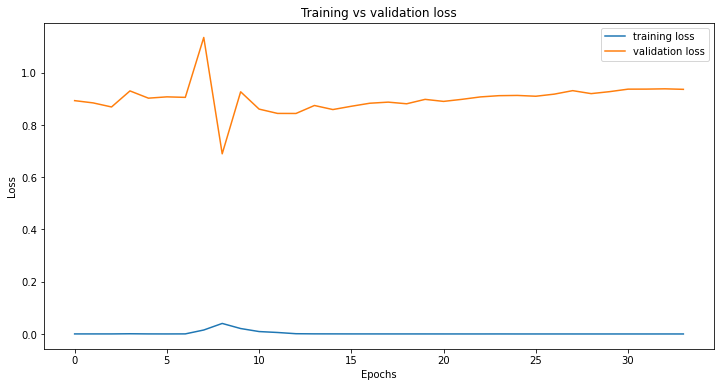

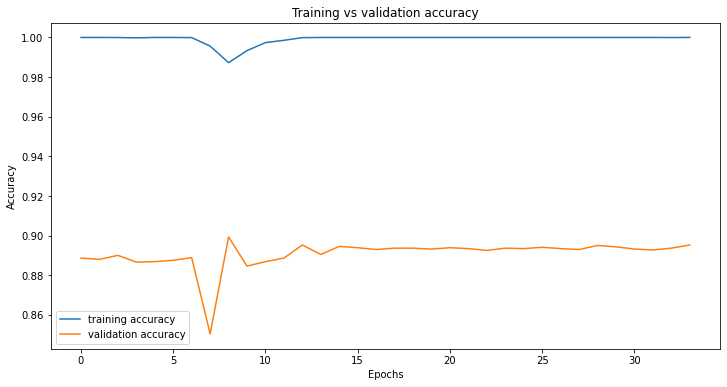

In [56]:
epochs = range(len(df_history['loss']))

plt.figure(figsize = (12,6))
plt.plot(epochs, df_history['loss'], label = 'training loss')
plt.plot(epochs, df_history['val_loss'], label = 'validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation loss")
plt.show()



plt.figure(figsize = (12,6))
plt.plot(epochs, df_history['accuracy'], label = 'training accuracy')
plt.plot(epochs, df_history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs validation accuracy")
plt.show()

In [59]:
y_pred = cnn_model.predict_classes(X_test_gray_norm)
y_pred

C:\Users\shamb\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  8,  7, 10], dtype=int64)

In [62]:
# calculating the classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

<AxesSubplot:>

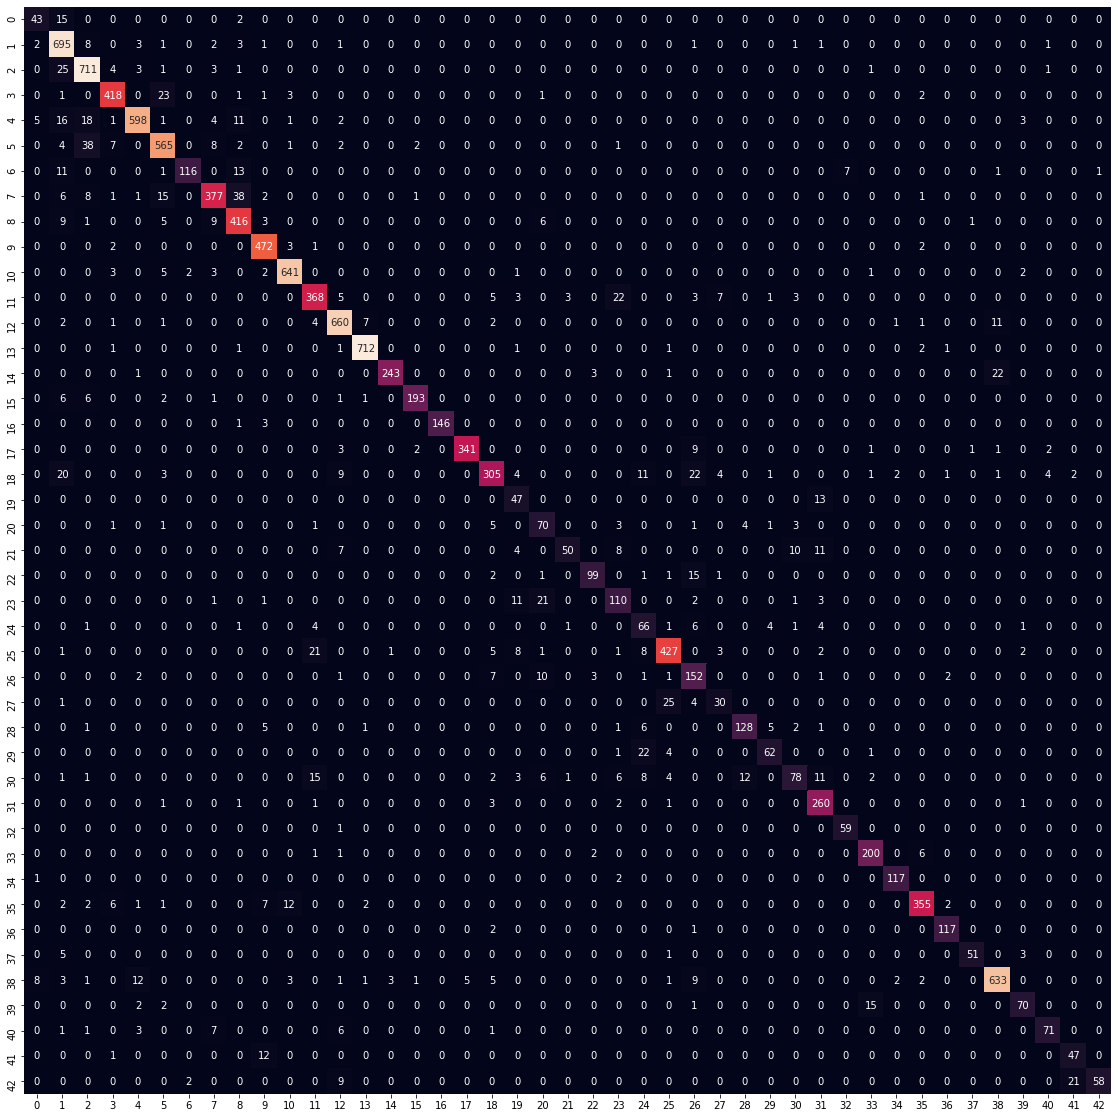

In [65]:
plt.figure(figsize = (20,20))
sns.heatmap(confusion_matrix(y_test, y_pred), square = True, annot = True, fmt = 'd', cbar = False)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72        60
           1       0.84      0.97      0.90       720
           2       0.89      0.95      0.92       750
           3       0.94      0.93      0.93       450
           4       0.96      0.91      0.93       660
           5       0.90      0.90      0.90       630
           6       0.97      0.77      0.86       150
           7       0.91      0.84      0.87       450
           8       0.85      0.92      0.88       450
           9       0.93      0.98      0.95       480
          10       0.97      0.97      0.97       660
          11       0.88      0.88      0.88       420
          12       0.93      0.96      0.94       690
          13       0.98      0.99      0.99       720
          14       0.98      0.90      0.94       270
          15       0.97      0.92      0.94       210
          16       1.00      0.97      0.99       150
          17       0.99    

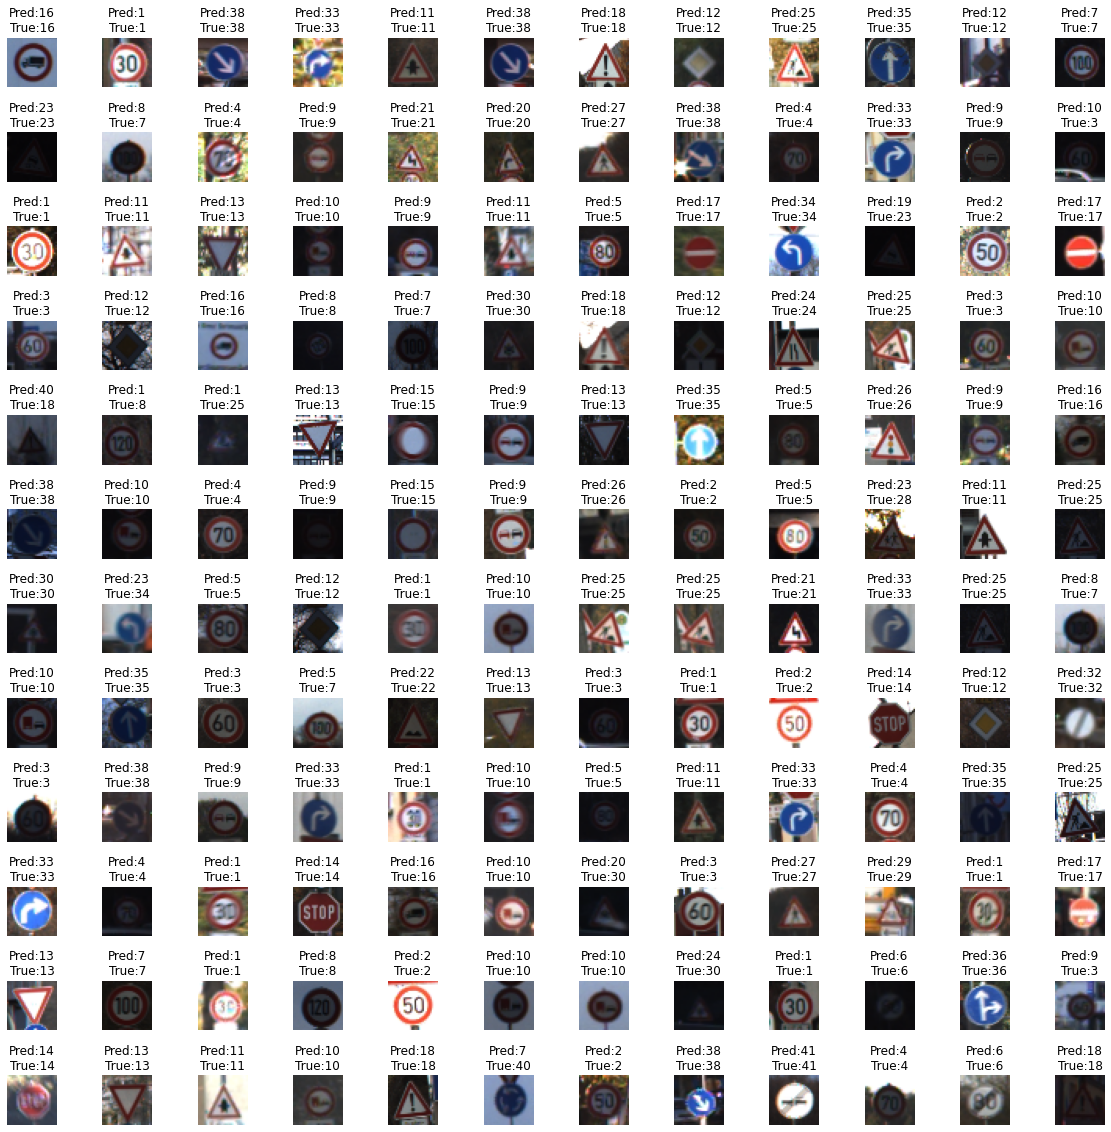

In [76]:
#  Visualizing the results in order to see how well the model performed in predicting the target classes

length = 12
width = 12
fig,axes = plt.subplots(length, width, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, length * width):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Pred:{}\nTrue:{}".format(y_pred[i], y_test[i]))
    
    #     switching off the axes for each images to show it more clearly
    axes[i].axis('off')
    

# adding some space between the images to make the visualization clearer
plt.subplots_adjust(hspace= 0.9, wspace= 0.4)     